In [96]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
model_path = Path('/home/jun/PersonReID/model')    
market_result_path = list(model_path.glob('*market/result.txt'))
duke_result_path = list(model_path.glob('*duke/result.txt'))
cuhk03_result_path = list(model_path.glob('*cuhk03/result.txt')) 

In [97]:
class result:
    def __init__(self, rank1, rank5, rank10, map):
        self.rank1 = rank1
        self.rank5 = rank5 
        self.rank10 = rank10 
        self.map = map

In [98]:
market_result = {}
for result_path in market_result_path:
    model_name = result_path.parents[0].name.split("_")[0]
    (rank1, rank5, rank10, map) = open(result_path).readlines()[-1].strip().split(' ')
    rank1 = float(rank1.split(':')[1])
    rank5 = float(rank5.split(':')[1])
    rank10 = float(rank10.split(':')[1])
    map = float(map.split(':')[1])
    market_result.update({model_name : result(rank1, rank5, rank10, map)})

sorted_market_result = dict(sorted(market_result.items(), key=lambda item: item[1].map))
for model_name, model_result in sorted_market_result.items():
    print(f'Model {model_name}: rank@1: {model_result.rank1} | rank@5: {model_result.rank5} | rank@10: {model_result.rank10} | mAP: {model_result.map}')

Model efficient: rank@1: 0.80671 | rank@5: 0.925178 | rank@10: 0.950119 | mAP: 0.583414
Model NAS: rank@1: 0.817696 | rank@5: 0.925772 | rank@10: 0.95101 | mAP: 0.591682
Model resnet: rank@1: 0.841746 | rank@5: 0.929632 | rank@10: 0.956354 | mAP: 0.642447
Model dense: rank@1: 0.854216 | rank@5: 0.938242 | rank@10: 0.961401 | mAP: 0.658422
Model hr: rank@1: 0.861639 | rank@5: 0.942102 | rank@10: 0.961698 | mAP: 0.691974
Model convnext: rank@1: 0.913302 | rank@5: 0.969715 | rank@10: 0.982779 | mAP: 0.774202
Model PCB: rank@1: 0.937945 | rank@5: 0.977138 | rank@10: 0.986342 | mAP: 0.81593
Model swin: rank@1: 0.940618 | rank@5: 0.982482 | rank@10: 0.989608 | mAP: 0.840688
Model vit: rank@1: 0.934679 | rank@5: 0.978028 | rank@10: 0.987827 | mAP: 0.840934


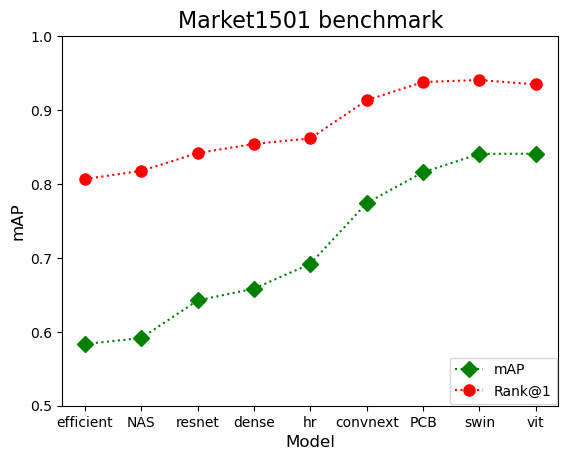

In [200]:
rank1_list = [x.rank1 for x in sorted_market_result.values()]
rank5_list = [x.rank5 for x in sorted_market_result.values()]
rank10_list = [x.rank10 for x in sorted_market_result.values()]
map_list = [x.map for x in sorted_market_result.values()]
labels = [model_name for model_name in sorted_market_result.keys()]
plt.plot(labels, map_list, ':gD', markersize='8', label='mAP')
plt.plot(labels, rank1_list, ':ro', markersize='8', label='Rank@1')
plt.legend(bbox_to_anchor=(0.998, 0.13), loc='upper right', borderaxespad=0, fontsize=10)
plt.title("Market1501 benchmark", fontsize = 16)
plt.xlabel("Model", fontsize = 12)
plt.ylabel("mAP", fontsize = 12)
plt.axis([None, None, 0.5, 1])
plt.show()

In [135]:
'''
================    ===============================
character           description
================    ===============================
   -                solid line style
   --               dashed line style
   -.               dash-dot line style
   :                dotted line style
   .                point marker
   ,                pixel marker
   o                circle marker
   v                triangle_down marker
   ^                triangle_up marker
   <                triangle_left marker
   >                triangle_right marker
   1                tri_down marker
   2                tri_up marker
   3                tri_left marker
   4                tri_right marker
   s                square marker
   p                pentagon marker
   *                star marker
   h                hexagon1 marker
   H                hexagon2 marker
   +                plus marker
   x                x marker
   D                diamond marker
   d                thin_diamond marker
   |                vline marker
   _                hline marker
================    ===============================
'''

'\n================    ===============================\ncharacter           description\n================    ===============================\n   -                solid line style\n   --               dashed line style\n   -.               dash-dot line style\n   :                dotted line style\n   .                point marker\n   ,                pixel marker\n   o                circle marker\n   v                triangle_down marker\n   ^                triangle_up marker\n   <                triangle_left marker\n   >                triangle_right marker\n   1                tri_down marker\n   2                tri_up marker\n   3                tri_left marker\n   4                tri_right marker\n   s                square marker\n   p                pentagon marker\n   *                star marker\n   h                hexagon1 marker\n   H                hexagon2 marker\n   +                plus marker\n   x                x marker\n   D                diamond marker\n   d  

In [162]:
for result_path in duke_result_path:
    model_name = result_path.parents[0].name.split("_")[0]
    (rank1, rank5, rank10, map) = open(result_path).readlines()[-1].strip().split(' ')
    rank1 = float(rank1.split(':')[1])
    rank5 = float(rank5.split(':')[1])
    rank10 = float(rank10.split(':')[1])
    map = float(map.split(':')[1])
    duke_result.update({model_name : result(rank1, rank5, rank10, map)})

sorted_duke_result = dict(sorted(duke_result.items(), key=lambda item: item[1].map))
for model_name, model_result in sorted_duke_result.items():
    print(f'Model {model_name}: rank@1: {model_result.rank1} | rank@5: {model_result.rank5} | rank@10: {model_result.rank10} | mAP: {model_result.map}')

Model NAS: rank@1: 0.7307 | rank@5: 0.858618 | rank@10: 0.889587 | mAP: 0.531768
Model efficient: rank@1: 0.731598 | rank@5: 0.85368 | rank@10: 0.89228 | mAP: 0.541578
Model resnet: rank@1: 0.775135 | rank@5: 0.878815 | rank@10: 0.916068 | mAP: 0.596776
Model dense: rank@1: 0.780521 | rank@5: 0.88465 | rank@10: 0.921454 | mAP: 0.607011
Model hr: rank@1: 0.789048 | rank@5: 0.887792 | rank@10: 0.917415 | mAP: 0.624117
Model convnext: rank@1: 0.822262 | rank@5: 0.913824 | rank@10: 0.938061 | mAP: 0.667504
Model PCB: rank@1: 0.857271 | rank@5: 0.934919 | rank@10: 0.95018 | mAP: 0.735684
Model swin: rank@1: 0.872531 | rank@5: 0.942549 | rank@10: 0.960952 | mAP: 0.752432
Model vit: rank@1: 0.876571 | rank@5: 0.938959 | rank@10: 0.958259 | mAP: 0.757447


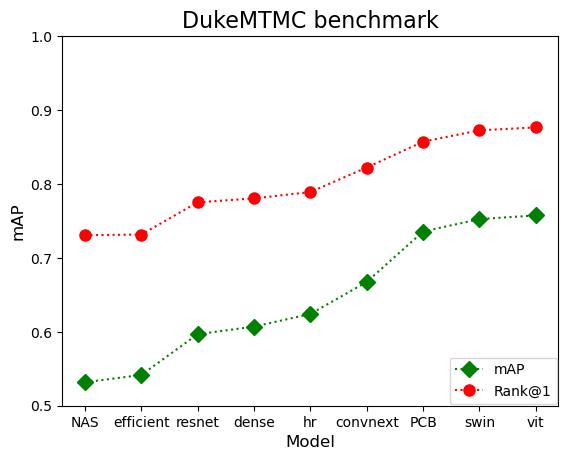

In [202]:
rank1_list = [x.rank1 for x in sorted_duke_result.values()]
rank5_list = [x.rank5 for x in sorted_duke_result.values()]
rank10_list = [x.rank10 for x in sorted_duke_result.values()]
map_list = [x.map for x in sorted_duke_result.values()]
labels = [model_name for model_name in sorted_duke_result.keys()]
plt.plot(labels, map_list, ':gD', markersize='8', label='mAP')
plt.plot(labels, rank1_list, ':ro', markersize='8', label='Rank@1')
plt.legend(bbox_to_anchor=(0.998, 0.13), loc='upper right', borderaxespad=0, fontsize=10)
plt.title("DukeMTMC benchmark", fontsize = 16)
plt.xlabel("Model", fontsize = 12)
plt.ylabel("mAP", fontsize = 12)
plt.axis([None, None, 0.5, 1])
plt.show()

In [91]:
cuhk03_result = {}
for result_path in cuhk03_result_path:
    model_name = result_path.parents[0].name.split("_")[0]
    (rank1, rank5, rank10, map) = open(result_path).readlines()[-1].strip().split(' ')
    rank1 = float(rank1.split(':')[1])
    rank5 = float(rank5.split(':')[1])
    rank10 = float(rank10.split(':')[1])
    map = float(map.split(':')[1])
    cuhk03_result.update({model_name : result(rank1, rank5, rank10, map)})

sorted_cuhk03_result = dict(sorted(cuhk03_result.items(), key=lambda item: item[1].map))
for model_name, model_result in sorted_cuhk03_result.items():
    print(f'Model {model_name}: rank@1: {model_result.rank1} | rank@5: {model_result.rank5} | rank@10: {model_result.rank10} | mAP: {model_result.map}')

Model NAS: rank@1: 0.594286 | rank@5: 0.707143 | rank@10: 0.766429 | mAP: 0.536534
Model efficient: rank@1: 0.599286 | rank@5: 0.710714 | rank@10: 0.762857 | mAP: 0.541852
Model dense: rank@1: 0.652143 | rank@5: 0.768571 | rank@10: 0.820714 | mAP: 0.599312
Model resnet: rank@1: 0.653571 | rank@5: 0.775 | rank@10: 0.822857 | mAP: 0.600221
Model hr: rank@1: 0.702143 | rank@5: 0.812143 | rank@10: 0.857857 | mAP: 0.649476
Model convnext: rank@1: 0.724286 | rank@5: 0.834286 | rank@10: 0.875714 | mAP: 0.685046
Model PCB: rank@1: 0.78 | rank@5: 0.88 | rank@10: 0.931429 | mAP: 0.739856
Model swin: rank@1: 0.800714 | rank@5: 0.891429 | rank@10: 0.922857 | mAP: 0.758876
Model vit: rank@1: 0.848571 | rank@5: 0.915 | rank@10: 0.940714 | mAP: 0.806791


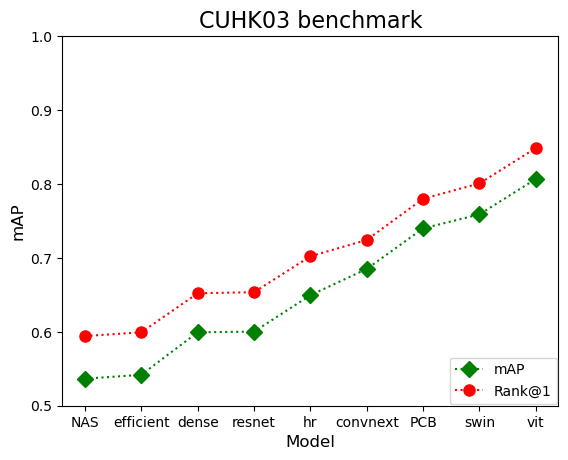

In [203]:
rank1_list = [x.rank1 for x in sorted_cuhk03_result.values()]
rank5_list = [x.rank5 for x in sorted_cuhk03_result.values()]
rank10_list = [x.rank10 for x in sorted_cuhk03_result.values()]
map_list = [x.map for x in sorted_cuhk03_result.values()]
labels = [model_name for model_name in sorted_cuhk03_result.keys()]
plt.plot(labels, map_list, ':gD', markersize='8', label='mAP')
plt.plot(labels, rank1_list, ':ro', markersize='8', label='Rank@1')
plt.legend(bbox_to_anchor=(0.998, 0.13), loc='upper right', borderaxespad=0, fontsize=10)
plt.title("CUHK03 benchmark", fontsize = 16)
plt.xlabel("Model", fontsize = 12)
plt.ylabel("mAP", fontsize = 12)
plt.axis([None, None, 0.5, 1])
plt.show()